In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='thoraric', src=FILE, fpath='./hce_data/thoraric/thoraric.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.012125492095947266] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "dgn": "categorical",
    "pre4": "numeric",
    "pre5": "numeric",
    "pre6": "categorical",
    "pre7": "categorical",
    "pre8": "categorical",
    "pre9": "categorical",
    "pre10": "categorical",
    "pre11": "categorical",
    "pre14": "categorical",
    "pre17": "categorical",
    "pre19": "categorical",
    "pre25": "categorical",
    "pre30": "categorical",
    "pre32": "categorical",
    "age": "numeric",
    "risk1yr": "categorical"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:inferred operators of attributes: {'dgn': ['equal'], 'pre4': ['equal'], 'pre5': ['equal'], 

In [4]:
pf.session.load_training_data(multiplier = None, difference=True)

INFO:profiler.utility:[0.07526183128356934] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 21 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 21, and the bound is 0.00122002
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 17/17 [00:00<00:00, 261.83it/s]
INFO:profiler.data.transformer:Number of training samples: 15980
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[0.40955424308776855] Create Training Data execution time: 0.3342924118041992



In [5]:
# set sparsity to 0 for exp_reproduce 
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[0.4161238670349121] Learn Structure start

INFO:profiler.learner:use threshold 1.1800
INFO:profiler.utility:[0.5570311546325684] Learn Structure execution time: 0.14090728759765625



In [6]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[0.5623905658721924] Get Dependencies start

INFO:profiler.utility:[0.6428709030151367] Get Dependencies execution time: 0.08048033714294434



pre4 -> pre5 (0.011562037229779606)
pre6 -> pre10 (0.18378261245395497)
pre32 -> pre9 (0.11319012276093704)
pre32,pre9 -> pre19 (0.0151643507821872)
pre32,pre9,pre19 -> pre25 (0.0353990356789019)
pre32,pre19 -> pre17 (0.1210114228830436)
pre32,pre19 -> pre7 (0.1102151399052867)
pre7 -> pre8 (0.1799135944653521)
pre19 -> pre11 (0.20128737060955573)
pre32 -> pre30 (0.2072397160537068)
{'dgn': array([], dtype=object), 'pre14': array([], dtype=object), 'age': array([], dtype=object), 'risk1yr': array([], dtype=object), 'pre4': array([], dtype=object), 'pre5': array(['pre4'], dtype=object), 'pre6': array([], dtype=object), 'pre10': array(['pre6'], dtype=object), 'pre32': array([], dtype=object), 'pre9': array(['pre32'], dtype=object), 'pre19': array(['pre32', 'pre9'], dtype=object), 'pre25': array(['pre32', 'pre9', 'pre19'], dtype=object), 'pre17': array(['pre32', 'pre19'], dtype=object), 'pre7': array(['pre32', 'pre19'], dtype=object), 'pre8': array(['pre7'], dtype=object), 'pre11': array(

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


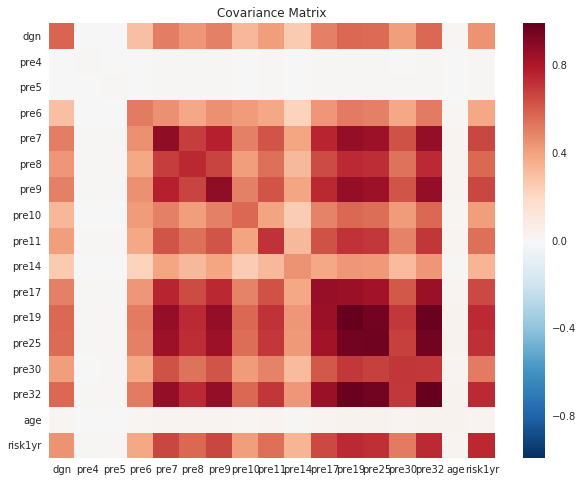

In [7]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


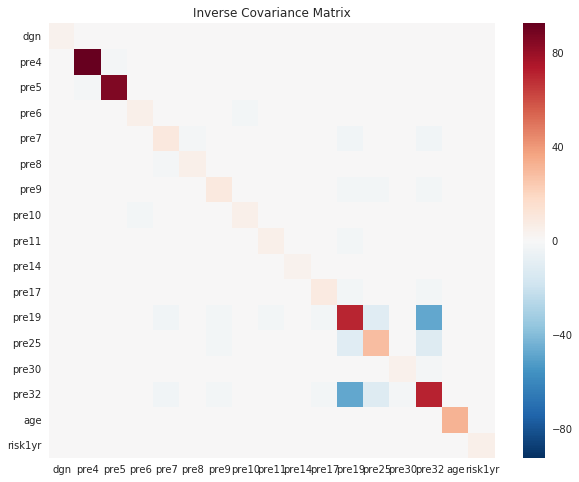

none-zero pairs of abs inv


In [8]:
pf.session.visualize_inverse_covariance()

In [9]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.012125,start: Load Data,0.000000
1,0.067580,end: Load Data,0.055454
2,0.075262,start: Create Training Data,0.000000
3,0.409554,end: Create Training Data,0.334292
4,0.416124,start: Learn Structure,0.000000
5,0.557031,end: Learn Structure,0.140907
6,0.562391,start: Get Dependencies,0.000000
7,0.642871,end: Get Dependencies,0.080480
8,0.642871,total_execution_time,0.611134


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


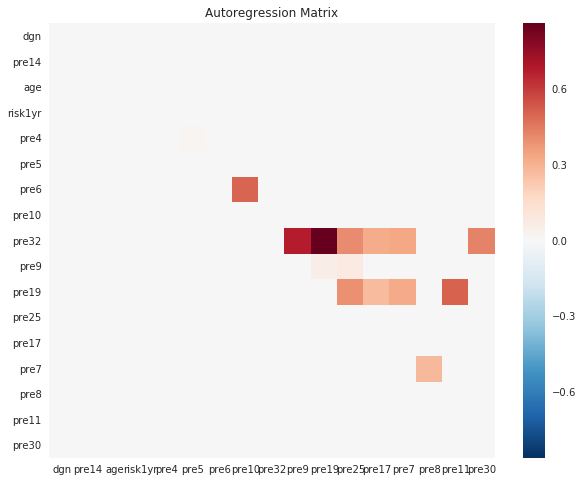

In [10]:
pf.session.visualize_autoregression()

In [11]:
pf.session.timer.to_csv()

##### 